# Assignment

---

## Topic
Option 1: Clustering/Pattern Mining <br>
Task: Use any unsupervised technique to extract patterns or segregate data into groups.<br>
User Story: User should be able to provide a data point (a row) and program should be able to identify<br>
to which group given data point belongs to and why?<br>
Hint: ARM/ Clustering<br>

---

### Table of Content

>1. <a href="#Importing-the-Libraries">Importing the Libraries</a>
2. <a href="#Importing-the-Dataset">Importing the Dataset</a>
3. <a href="#Loading-the-Dataset-and-Getting-it-to-Know">Loading the Dataset and Getting it to Know</a>
4. <a href="#Filtering">Filtering</a>
5. <a href="#Identifying-Null-Values">Identifying Null Values</a>
6. <a href="#Independent-Variables">Independent Variables</a>
7. <a href="#Normalisation">Normalisation</a>
8. <a href="#K-Mean-Clustering">K Mean Clustering</a>
9. <a href="#Within-Sum-of-Square-Method-for-Elbow">Within Sum of Square Method for Elbow</a>
10. <a href="#Prediction-on-the-Test-Data">Prediction on the Test Data</a>
11. <a href="#Clustering">Clustering</a>

---

### Importing the Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Importing the Dataset

In [2]:
df=pd.read_csv(r"C:\Users\kshit\OneDrive\Desktop\Online Ret.xlsx - Online Retail.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Time,UnitPrice,CustomerID,Country
0,550644,22722,SET OF 6 SPICE TINS PANTRY DESIGN,7,40652.0,16:19,3.95,12733,USA
1,550644,22979,PANTRY WASHING UP BRUSH,2,40652.0,16:19,1.45,12733,USA
2,550644,84987,SET OF 36 TEATIME PAPER DOILIES,3,40652.0,16:19,1.45,12733,USA
3,550644,22720,SET OF 3 CAKE TINS PANTRY DESIGN,1,40652.0,16:19,4.95,12733,USA
4,550644,22993,SET OF 4 PANTRY JELLY MOULDS,1,40652.0,16:19,1.25,12733,USA
...,...,...,...,...,...,...,...,...,...
286,C581229,23158,SET OF 5 LUCKY CAT MAGNETS,-36,40767.0,10:14:00,2.08,12558,USA
287,C581229,22712,CARD DOLLY GIRL,-12,40767.0,10:14:00,0.42,12558,USA
288,C581229,22027,TEA PARTY BIRTHDAY CARD,-12,40767.0,10:14:00,0.42,12558,USA
289,C581229,21508,VINTAGE KID DOLLY CARD,-12,40767.0,10:14:00,0.42,12558,USA


### Loading the Dataset and Getting it to Know

In [3]:
m,n=df.shape
print('Number of Rows    :',m)
print('Number of Columns :',n)

Number of Rows    : 291
Number of Columns : 9


In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Time', 'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate    float64
Time            object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [6]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate    float64
Time            object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [7]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,291.000000,291.000000,291.000000,291.000000
mean,3.553265,40812.725086,2.216426,12618.852234
std,16.450545,85.987730,2.261647,38.491407
min,-36.000000,40586.000000,0.420000,12558.000000
25%,-10.000000,40826.000000,0.850000,12607.000000
50%,5.000000,40826.000000,1.450000,12607.000000
75%,12.000000,40887.000000,2.950000,12607.000000
max,72.000000,40887.000000,16.950000,12733.000000


### Filtering

In [8]:
df2=df[df['Quantity']>=0]
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Time,UnitPrice,CustomerID,Country
0,550644,22722,SET OF 6 SPICE TINS PANTRY DESIGN,7,40652.0,16:19,3.95,12733,USA
1,550644,22979,PANTRY WASHING UP BRUSH,2,40652.0,16:19,1.45,12733,USA
2,550644,84987,SET OF 36 TEATIME PAPER DOILIES,3,40652.0,16:19,1.45,12733,USA
3,550644,22720,SET OF 3 CAKE TINS PANTRY DESIGN,1,40652.0,16:19,4.95,12733,USA
4,550644,22993,SET OF 4 PANTRY JELLY MOULDS,1,40652.0,16:19,1.25,12733,USA
...,...,...,...,...,...,...,...,...,...
275,580553,20675,BLUE POLKADOT BOWL,16,40675.0,10:14:00,1.25,12646,USA
276,580553,20676,RED RETROSPOT BOWL,16,40675.0,10:14:00,1.25,12646,USA
277,580553,20975,12 PENCILS SMALL TUBE RED RETROSPOT,72,40675.0,10:14:00,0.65,12646,USA
278,580553,22083,PAPER CHAIN KIT RETROSPOT,12,40675.0,10:14:00,2.95,12646,USA


In [9]:
df3=df2[df2['UnitPrice']>=0]
df3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Time,UnitPrice,CustomerID,Country
0,550644,22722,SET OF 6 SPICE TINS PANTRY DESIGN,7,40652.0,16:19,3.95,12733,USA
1,550644,22979,PANTRY WASHING UP BRUSH,2,40652.0,16:19,1.45,12733,USA
2,550644,84987,SET OF 36 TEATIME PAPER DOILIES,3,40652.0,16:19,1.45,12733,USA
3,550644,22720,SET OF 3 CAKE TINS PANTRY DESIGN,1,40652.0,16:19,4.95,12733,USA
4,550644,22993,SET OF 4 PANTRY JELLY MOULDS,1,40652.0,16:19,1.25,12733,USA
...,...,...,...,...,...,...,...,...,...
275,580553,20675,BLUE POLKADOT BOWL,16,40675.0,10:14:00,1.25,12646,USA
276,580553,20676,RED RETROSPOT BOWL,16,40675.0,10:14:00,1.25,12646,USA
277,580553,20975,12 PENCILS SMALL TUBE RED RETROSPOT,72,40675.0,10:14:00,0.65,12646,USA
278,580553,22083,PAPER CHAIN KIT RETROSPOT,12,40675.0,10:14:00,2.95,12646,USA


In [10]:
#df.InvoiceDate=pd.to_datetime(df.InvoiceDate,errors='ignore')
#df.InvoiceDate = df["InvoiceDate"].values.astype('object')
#df['InvoiceDate'].astype('float64')

### Identifying Null Values

In [11]:
df3['CustomerID'].dropna

<bound method Series.dropna of 0      12733
1      12733
2      12733
3      12733
4      12733
       ...  
275    12646
276    12646
277    12646
278    12646
279    12646
Name: CustomerID, Length: 179, dtype: int64>

### Independent Variables

In [12]:
x=df.iloc[:,[4,7]].values
print('The Independent Columns: \n',x)

The Independent Columns: 
 [[40652. 12733.]
 [40652. 12733.]
 [40652. 12733.]
 [40652. 12733.]
 [40652. 12733.]
 [40652. 12733.]
 [40652. 12733.]
 [40652. 12733.]
 [40652. 12733.]
 [40652. 12733.]
 [40652. 12733.]
 [40652. 12733.]
 [40652. 12733.]
 [40652. 12733.]
 [40652. 12733.]
 [40652. 12733.]
 [40652. 12733.]
 [40652. 12733.]
 [40652. 12733.]
 [40652. 12733.]
 [40652. 12733.]
 [40652. 12733.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40826. 12607.]
 [40

### Normalisation

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
print(x)

[[-1.87238296  2.97064752]
 [-1.87238296  2.97064752]
 [-1.87238296  2.97064752]
 [-1.87238296  2.97064752]
 [-1.87238296  2.97064752]
 [-1.87238296  2.97064752]
 [-1.87238296  2.97064752]
 [-1.87238296  2.97064752]
 [-1.87238296  2.97064752]
 [-1.87238296  2.97064752]
 [-1.87238296  2.97064752]
 [-1.87238296  2.97064752]
 [-1.87238296  2.97064752]
 [-1.87238296  2.97064752]
 [-1.87238296  2.97064752]
 [-1.87238296  2.97064752]
 [-1.87238296  2.97064752]
 [-1.87238296  2.97064752]
 [-1.87238296  2.97064752]
 [-1.87238296  2.97064752]
 [-1.87238296  2.97064752]
 [-1.87238296  2.97064752]
 [ 0.15464744 -0.30844939]
 [ 0.15464744 -0.30844939]
 [ 0.15464744 -0.30844939]
 [ 0.15464744 -0.30844939]
 [ 0.15464744 -0.30844939]
 [ 0.15464744 -0.30844939]
 [ 0.15464744 -0.30844939]
 [ 0.15464744 -0.30844939]
 [ 0.15464744 -0.30844939]
 [ 0.15464744 -0.30844939]
 [ 0.15464744 -0.30844939]
 [ 0.15464744 -0.30844939]
 [ 0.15464744 -0.30844939]
 [ 0.15464744 -0.30844939]
 [ 0.15464744 -0.30844939]
 

### K Mean Clustering

C:\Users\kshit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\kshit\AppData\Local\Temp\ipykernel_1576\3847038247.py:9: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(x)
C:\Users\kshit\AppData\Local\Temp\ipykernel_1576\3847038247.py:9: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(x)
C:\Users\kshit\AppData\Local\Temp\ipykernel_1576\3847038247.py:9: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(x)


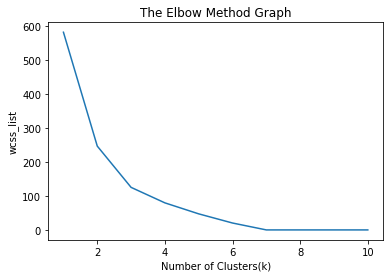

In [14]:
from sklearn.cluster import KMeans

# Next we have created the xcc_list variable to initialize an empty list,
# which is used to contain the values of wcc computed for different values of k ranging from 1 to 10
# The Graph is called Silhoutte graph
wcc_list=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=1)
    kmeans.fit(x)
    wcc_list.append(kmeans.inertia_) #inertia_ is a predefined attribute of KMeans
plt.plot(range(1,11),wcc_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('wcss_list')
plt.show()

### Within Sum of Square Method for Elbow

In [15]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcc_list,curve='convex',direction='decreasing')
kl.elbow
# Since the elbow point is at 5. So the number of clusters here will be 5

3

### Prediction on the Test Data

In [16]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=1)
y_predict=kmeans.fit_predict(x)

# In the second line of code, we have created the dependent variable y_predict to train the model
# By executing the above line of code, we will get the y_predict varianble
y_predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

### Clustering

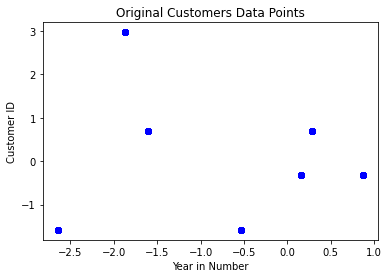

In [17]:
plt.scatter(x[:,0],x[:,1],c='blue',label='All Data Points')
plt.title('Original Customers Data Points')
plt.xlabel('Year in Number')
plt.ylabel('Customer ID')
plt.show()

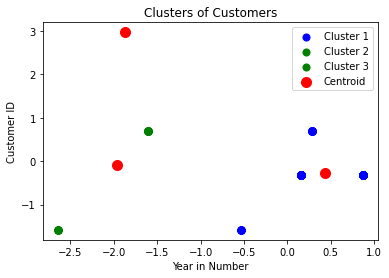

In [18]:
# For first cluster 
plt.scatter(x[y_predict==0,0],x[y_predict==0,1],s=50,c='blue',label='Cluster 1')

# For second cluster 
plt.scatter(x[y_predict==1,0],x[y_predict==1,1],s=50,c='green',label='Cluster 2')


# For third cluster 
plt.scatter(x[y_predict==2,0],x[y_predict==2,1],s=50,c='green',label='Cluster 3')

# Plot the centroid. This time we are going to use the kmeans.cluster_centres_
# Attributes that return here the coordinates of the centroid.

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red',label='Centroid')
plt.title('Clusters of Customers')
plt.xlabel('Year in Number')
plt.ylabel('Customer ID')
plt.legend()
plt.show()

In [19]:
print(kmeans.cluster_centers_)

[[ 0.43856343 -0.26485547]
 [-1.9608471  -0.08073432]
 [-1.87238296  2.97064752]]
